In [82]:
import os, sys
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns
from glob import glob

In [83]:
home = os.path.expanduser('~')
data_dir = os.path.join(home, 'Documents/diffusive_bandit/data/BIDS/sub*/ses*/beh/')

data_fn_pattern = ('sub-0*_ses-0*_task-diffusive-bandit_run-0*_*.csv')

data_path = os.path.join(data_dir, data_fn_pattern)

In [84]:
data_fns = glob(data_path)

In [85]:
data_dfs = [pd.read_csv(f) for f in data_fns]

In [86]:
data_df = pd.concat(data_dfs)

In [87]:
data_df.head()

,trial,subj_id,run,LR_choice,identity_choice,value_accuracy,LR_solution,reward,cumulative_reward,rt,total_trial_time,iti,high_value_identity,id_choice,stim_duration,stim_onset,stim_offset,abs_response_time,reward_f,reward_m
0,0,6,1,NaN,NaN,NaN,L,0,-20,NaN,1.501505,8.031937,f,NaN,1.490457,0.031171,1.521627,0.781585,84.0,27.0
1,1,6,1,76.0,f,True,L,8,-12,0.366704,1.501343,5.729698,f,f,1.492387,9.611587,11.103974,9.978300,83.0,56.0
2,2,6,1,76.0,f,True,L,6,-6,0.354341,1.501290,4.203782,f,f,1.492367,16.891376,18.383742,17.245736,62.0,43.0
3,3,6,1,76.0,f,True,L,4,-2,0.320085,1.501013,6.510086,f,f,1.491961,22.635557,24.127518,22.955650,49.0,22.0
4,4,6,1,76.0,f,True,L,7,5,0.354133,1.500840,5.229639,f,f,1.486547,30.699895,32.186442,31.054039,75.0,24.0


In [88]:
data_df.columns

Index(['trial', 'subj_id', 'run', 'LR_choice', 'identity_choice',
       'value_accuracy', 'LR_solution', 'reward', 'cumulative_reward', 'rt',
       'total_trial_time', 'iti', 'high_value_identity', 'id_choice',
       'stim_duration', 'stim_onset', 'stim_offset', 'abs_response_time',
       'reward_f', 'reward_m'],
      dtype='object')

In [78]:
data_df.high_value_identity

0     f
1     f
2     f
3     f
4     f
5     f
6     f
7     f
8     f
9     f
10    m
11    m
Name: high_value_identity, dtype: object

In [79]:
data_df.identity_choice

0     NaN
1     NaN
2       m
3       m
4       m
5       m
6       m
7     NaN
8       m
9       m
10    NaN
11    NaN
Name: identity_choice, dtype: object

In [80]:
data_df.reward

0      0
1      0
2     43
3     22
4     24
5     35
6     38
7      0
8     41
9     39
10     0
11     0
Name: reward, dtype: int64

In [81]:
data_df.columns


Index(['trial', 'subj_id', 'run', 'LR_choice', 'identity_choice',
       'value_accuracy', 'LR_solution', 'reward', 'cumulative_reward', 'rt',
       'total_trial_time', 'iti', 'high_value_identity', 'id_choice',
       'stim_duration', 'stim_onset', 'stim_offset', 'abs_response_time'],
      dtype='object')

/Users/i_67981492/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:85: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 0, 'Trial')

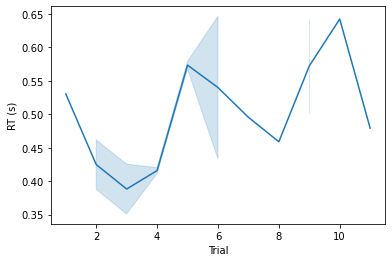

In [70]:
sns.lineplot(x="trial",y="rt", data=data_df, estimator=np.nanmean)
plt.ylabel('RT (s)'); plt.xlabel('Trial')

In [56]:
data_df['value_accuracy'] = data_df.value_accuracy.astype(float)

Text(0.5, 0, 'Trial')

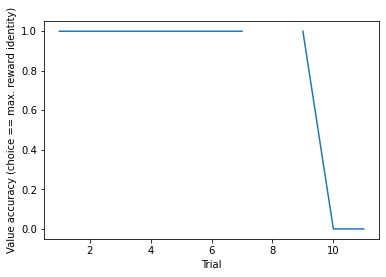

In [57]:
sns.lineplot(x="trial",y="value_accuracy", data=data_df, estimator=np.nanmean)
plt.ylabel('Value accuracy (choice == max. reward identity)'); plt.xlabel('Trial')